In [ ]:
#Description : This program classifies images

In [2]:
#Import the libararies
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
#Load the data
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [4]:
#Look at the data types of the variables
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [5]:
#Get the shape of the arrays
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [6]:
#Take a look at the first image as an array 
index=0
x_train[index]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

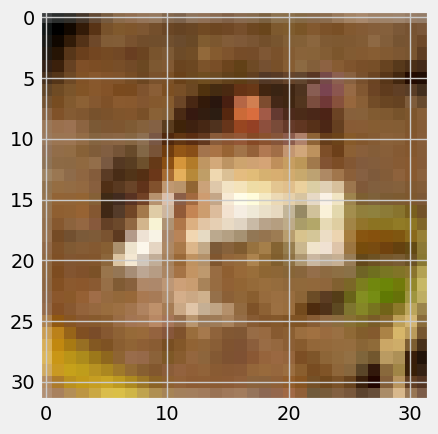

In [7]:
#Show the image as a picture 
img=plt.imshow(x_train[index])

In [8]:
#Get the image label
print('The image label is:', y_train[index])

The image label is: [6]


In [9]:
#Get the image classfication 
classification=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
#Print the image class
print('The image class is:', classification[y_train[index][0]])

The image class is: frog


In [10]:
#Covert the labels into a set of 10 numbers to input into the neural network
y_train_one_hot=to_categorical(y_train)
y_test_one_hot=to_categorical(y_test)

In [11]:
#Print the new labels 
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [12]:
#Print the new label of the image/picture above
print('The one hot label is:', y_train_one_hot[index])

The one hot label is: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [13]:
#Normalize the pixels to be values between 0 and 1
x_train=x_train/255
x_test=x_test/255

In [14]:
x_train[index]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [15]:
#Create the models architecture 
model=Sequential()
#Add the first layer
model.add(Conv2D(32, (5,5), activation='relu', input_shape=(32,32,3)))
#Add a pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
#Add another convolution layer
model.add(Conv2D(32, (5,5), activation='relu'))
#Add another pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
#Add a flattening layer
model.add(Flatten())
#Add a layer with 1000 neutrons
model.add(Dense(1000, activation='relu'))
#Add a drop layer 
model.add(Dropout(0.5))
#Add a layer with 500 neutrons
model.add(Dense(500, activation='relu'))
#Add a drop layer  
model.add(Dropout(0.5))
#Add a layer with 250 neutrons
model.add(Dense(250, activation='relu'))
#Add a layer with 10 neutrons
model.add(Dense(10, activation='softmax'))

In [16]:
#Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [17]:
#Train the model
hist=model.fit(x_train, y_train_one_hot,
          batch_size=256,
          epochs=10,
          validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 44s 273ms/step - loss: 1.8266 - accuracy: 0.3145 - val_loss: 1.5508 - val_accuracy: 0.4253
Epoch 2/10
157/157 [==============================] - 41s 260ms/step - loss: 1.4696 - accuracy: 0.4617 - val_loss: 1.3621 - val_accuracy: 0.5099
Epoch 3/10
157/157 [==============================] - 42s 265ms/step - loss: 1.3237 - accuracy: 0.5224 - val_loss: 1.2763 - val_accuracy: 0.5474
Epoch 4/10
157/157 [==============================] - 41s 259ms/step - loss: 1.2127 - accuracy: 0.5668 - val_loss: 1.1357 - val_accuracy: 0.5940
Epoch 5/10
157/157 [==============================] - 41s 260ms/step - loss: 1.1187 - accuracy: 0.6014 - val_loss: 1.0945 - val_accuracy: 0.6119
Epoch 6/10
157/157 [==============================] - 41s 263ms/step - loss: 1.0572 - accuracy: 0.6261 - val_loss: 1.0908 - val_accuracy: 0.6185
Epoch 7/10
157/157 [==============================] - 41s 260ms/step - loss: 0.9920 - accuracy: 0.6496 - val_loss: 1.0242 - val_ac

In [18]:
#Evaluate the model using the test data set
model.evaluate(x_test, y_test_one_hot)[1]

313/313 [==============================] - 4s 13ms/step - loss: 0.9796 - accuracy: 0.6524


0.652400016784668

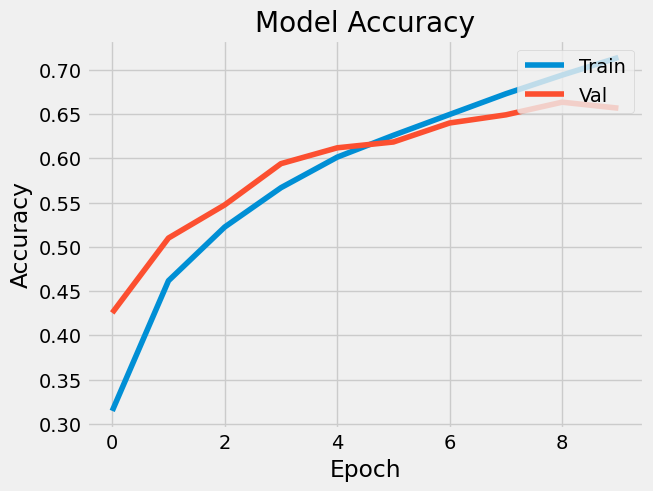

In [19]:
#Visualize the model's accuaracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

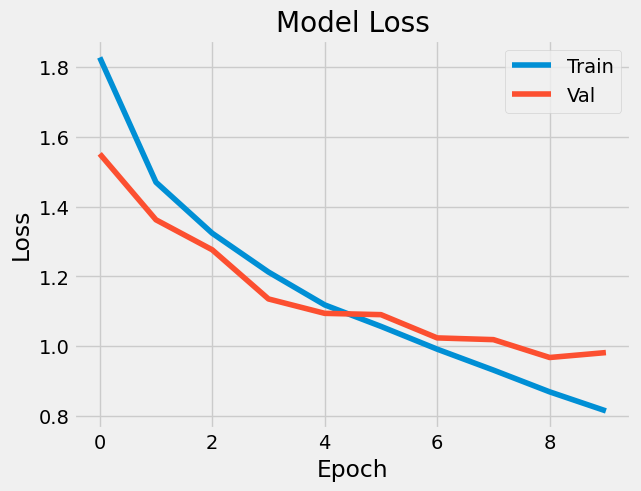

In [20]:
#Visualize the model's loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [26]:
#Test the model with an example
from google.colab import files
uploaded=files.upload()

Saving photo-1557427161-4701a0fa2f42.jpg to photo-1557427161-4701a0fa2f42.jpg


In [28]:
#Show the image
new_image=plt.imread('photo-1557427161-4701a0fa2f42.jpg')

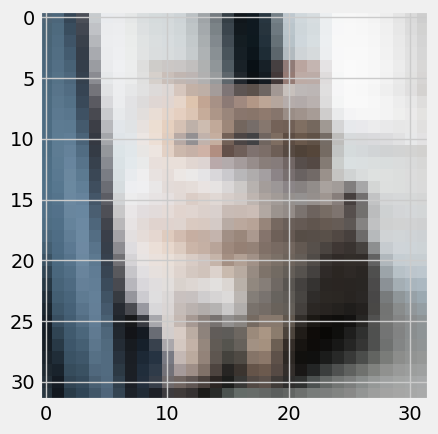

In [29]:
#Resize the image
from skimage.transform import resize
resized_image=resize(new_image, (32,32,3))
img=plt.imshow(resized_image)

In [30]:
#Get the models predictions
predictions=model.predict(np.array([resized_image]))
#Show the predictions
predictions

1/1 [==============================] - 0s 82ms/step


array([[0.00433075, 0.00138936, 0.02360573, 0.686238  , 0.00470817,
        0.21648392, 0.00593548, 0.02846389, 0.00695444, 0.02189035]],
      dtype=float32)

In [31]:
#Sort the predictions from least to greatest
list_index=[0,1,2,3,4,5,6,7,8,9]
x=predictions

for i in range(10):
  for j in range(10):
    if x[0][list_index[i]]>x[0][list_index[j]]:
      temp=list_index[i]
      list_index[i]=list_index[j]
      list_index[j]=temp


#Show the sorted labels in order
print(list_index)

[3, 5, 7, 2, 9, 8, 6, 4, 0, 1]


In [32]:
#Print the first 5 predictions
for i in range(5):
  print(classification[list_index[i]])

cat
dog
horse
bird
truck
